# **C213: Sistemas Embarcados**
**Professor**: Samuel Baraldi Mafra

**PED:** Igor Gonçalves de Souza

## **Objetivos:**
Este exemplo visa detalhar a modelagem de Sistemas com o Algortimo de Controle PID, desde a teoria do Algoritmo até a Modelagem do Controle.

Conteúdo:
  + Algoritmo de Controle PID;
  + Modelagem de Sistemas de Controle PID;
  + Sintonia de Controladores PID.

## **Pacote Control**
A Biblioteca de Sistemas de Controle Python (python-control) é um pacote que implementa operações básicas para análise e projeto de Sistemas de Controle.

Acesse: [Documentação python-control](https://pypi.org/project/control/)

In [1]:
#!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 5.9 MB/s eta 0:00:00


In [2]:
import numpy as np                # Suporte para arrays e operações matemáticas.
import control as ctrl            # Suporte para manipulação de Sistemas de Controle.
import matplotlib.pyplot as plt   # Suporte para visualização de gráficos.

## **Algoritmo de Controle PID:**
O Algoritmo de Controle PID é uma das abordagens mais comuns na área de controle, combinando três ações principais para regular a saída de um sistema em relação a uma referência desejada: Proporcional, Integral e Derivativa.

### **Controle Proporcional P:**
  Um controlador proporcional, de ganho $K_P$, tem o efeito de reduzir o tempo de resposta e o erro em regime permanent do sistema. $$$$
  $$y(t)=K_P\cdot e(t)\ \therefore\ \frac{PV(s)}{E(s)}=K_P$$ $$$$


  ### **Controle Integral I:**
  Um controlador integral, de ganho $K_I$ ou tempo de Integral $T_I$, elimina o erro em regime permanente, mas pode tornar a resposta do sistema mais lenta e aumentar o máximo pico da resposta para uma entrada do tipo degrau. $$$$
  $$y(t)=K_I \int e(t)\ dt\ \therefore\ \frac{PV(s)}{E(s)}=\frac{K_I}{s}\text{, com }K_I=\frac{K_P}{T_I}$$ $$$$

  ### **Controle Derivativo D:**
  Uma ação de controle derivativa, de ganho $K_D$ ou tempo de Derivada $T_D$, quando acrescentada a um controlador proporcional, permite que se obtenha um controlador de alta sensibilidade e previsilibidade, atuando com a taxa de variação do erro. $$$$
  $$y(t)=K_D\cdot\frac{d\ e(t)}{dt}\ \therefore\ \frac{PV(s)}{E(s)}=K_D\cdot s\text{, com }K_D=K_P\cdot T_D$$ $$$$

## **Modelagem de Controladores PID:**
O Controle Proporcional-Integral-Derivativo combina as ações de Controle supracitadas para gerar uma ação de controle em função do erro atuante no sistema: $$$$
$$PID(s)=K_P+\frac{K_I}{s}+K_D\cdot s\ \rightarrow\ PID(s)=\frac{K_D\cdot s^2+K_P\cdot s+K_I}{s}$$ $$$$

O Controlador PID atua na Malha de Controle do Sistema em Malha Fechada, em série com a Função de Transferência do Processo.

Os exemplos a seguir definem Controladores PID para um Sistema de Primeira Ordem com Atraso com $k=1.18$, $\tau=30$ e $\theta=10$. $$$$
$$H(s)=\frac{V_o(s)}{V_i(s)}=\frac{PV(s)}{SP(s)}=\frac{k}{\tau s+1}\cdot e^{-\theta s}=\frac{1.18}{30s+1}\cdot e^{-10s}$$ $$$$

In [100]:
ganhoEstatico, constanteTempo, atrasoTransporte = [1.18, 30, 10]
sys = ctrl.tf([ganhoEstatico], [constanteTempo, 1])
print(sys)

<TransferFunction>: sys[481]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  1.18
--------
30 s + 1



O Atraso de Transporte no Processo será modelado pela Aproximação de Padé com $R_N(s)$ de ordem $20$.

In [43]:
[num, den] = ctrl.pade(atrasoTransporte, 20)
sys_pade = ctrl.tf(num, den)

sys_atraso = ctrl.series(sys, sys_pade)

Sem atenção aos valores até aqui, os parâmetros dos PIDs serão $K_P=3.05$, $T_I=20$ e $T_D=5$ no primeiro exemplo e $K_P=0.37$, $T_I=35$ e $T_D=4.29$ no segundo.

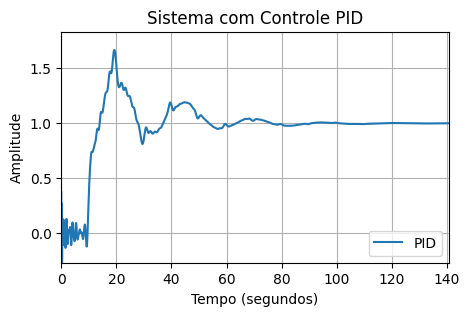

<Figure size 640x480 with 0 Axes>

In [86]:

Kp, Ti, Td = [3.05, 20, 5]
PID = ctrl.tf([Kp*Td, Kp, Kp/Ti], [1, 0])
Cs = ctrl.series(PID, sys_atraso)

[Tempo, Amplitude] = ctrl.step_response(ctrl.feedback(Cs))
plt.figure(figsize=(5, 3)), plt.plot(Tempo, Amplitude)

plt.title('Sistema com Controle PID')
plt.legend(['PID'], loc='lower right'), plt.grid(True)
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([np.min(Amplitude), np.max(Amplitude)*1.1]);

infos_PID = ctrl.step_info(ctrl.feedback(Cs))
print('Parâmetros do Sistema Controlado:',
      f'  - Tempo de subida: tr = {infos_PID.get("RiseTime"):.2f} [s]',
      f'  - Overshoot: tr = {infos_PID.get("Overshoot")/100:.2%}', sep='\n')

print(), plt.show(), plt.savefig('PID_Sintonia1.png', dpi=300);


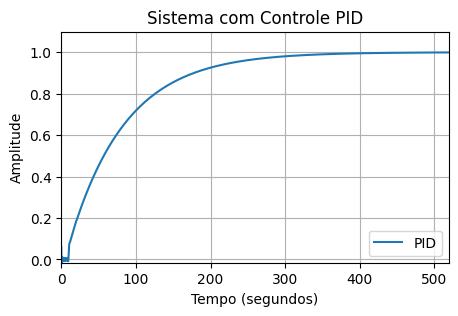

<Figure size 640x480 with 0 Axes>

In [88]:

Kp, Ti, Td = [0.37, 35, 4.29]
PID = ctrl.tf([Kp*Td, Kp, Kp/Ti], [1, 0])
Cs = ctrl.series(PID, sys_atraso)

[Tempo, Amplitude] = ctrl.step_response(ctrl.feedback(Cs))
plt.figure(figsize=(5, 3)), plt.plot(Tempo, Amplitude)

plt.title('Sistema com Controle PID')
plt.legend(['PID'], loc='lower right'), plt.grid(True)
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([np.min(Amplitude), np.max(Amplitude)*1.1])

infos_PID = ctrl.step_info(ctrl.feedback(Cs))
print('Parâmetros do Sistema Controlado:',
      f'  - Tempo de subida: tr = {infos_PID.get("RiseTime"):.2f} [s]',
      f'  - Overshoot: tr = {infos_PID.get("Overshoot")/100:.2%}', sep='\n')

print(), plt.show(), plt.savefig('PID_Sintonia2.png', dpi=300);


No primeiro exemplo de Modelagem, o Sistema Controlado responde de forma rápida, porém apresenta níveis elevados de *overshoot*. Já no segundo caso, foi possível reduzir o *overshoot* aceitando um tempo de resposta mais elevado.

Estas considerações são chamadas de **Critérios de Desempenho**, e definem os valores dos parâmetros do PID baseados em alguns métodos.

## **Sintonia de Controladores PID:**
A sintonia de um PID é a etapa de cálculo dos valores dos parâmetros da Função de Transferência do Controlador. Os métodos de sintonia são definidos por um critério de desempenho desejado para a malha, como um menor *overshoot* ou menor tempo de subida.

A parametrização se dá pela resposta ao degrau de um Sistema de Primeira Ordem com Atraso de Transporte em Malha Aberta, em que a razão $\frac{\theta}{\tau}$ entre o Atraso de Transporte e a Constante de Tempo é conhecida como **Fator de Incontrolabilidade**. Quanto maior esse fator, mais difícil se torna controlar o processo.

### **Sintonia pelo Método de Ziegler Nichols da Curva de Reação:**
O Método Ziegler Nichols Malha Aberta é definido a partir das características da resposta transitória do processo em Malha Aberta para uma entrada do tipo degrau. O Sistema em Malha Fechada apresenta uma taxa de decaimento de pelo menos $\frac{C}{A}= \frac{1}{4}$. Os parâmetros do PID são calculados como: $$$$

$$K_P=\frac{1.2\tau}{k\cdot\theta}\ \ \ \ \ T_I=2\theta\ \ \ \ \ T_D=\frac{\theta}{2}$$ $$$$

In [90]:
Kp = 1.2*constanteTempo/(ganhoEstatico*atrasoTransporte)
Ti = 2*atrasoTransporte
Td = atrasoTransporte/2

Parâmetros do Sistema Controlado:
  - Tempo de subida: tr = 12.79 [s]
  - Overshoot: tr = 66.62%



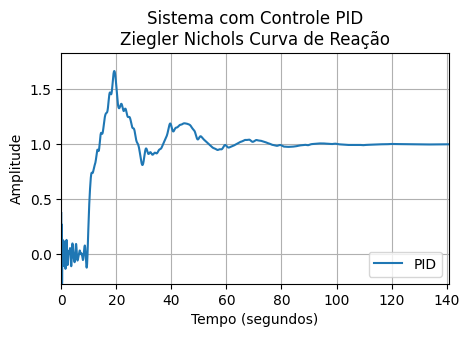

<Figure size 640x480 with 0 Axes>

In [93]:
PID = ctrl.tf([Kp*Td, Kp, Kp/Ti], [1, 0])
Cs = ctrl.series(PID, sys_atraso)

[Tempo, Amplitude] = ctrl.step_response(ctrl.feedback(Cs))
plt.figure(figsize=(5, 3)), plt.plot(Tempo, Amplitude)

plt.title('Sistema com Controle PID\nZiegler Nichols Curva de Reação')
plt.legend(['PID'], loc='lower right'), plt.grid(True)
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([np.min(Amplitude), np.max(Amplitude)*1.1])

infos_PID = ctrl.step_info(ctrl.feedback(Cs))
print('Parâmetros do Sistema Controlado:',
      f'  - Tempo de subida: tr = {infos_PID.get("RiseTime"):.2f} [s]',
      f'  - Overshoot: tr = {infos_PID.get("Overshoot")/100:.2%}', sep='\n')

print(), plt.show(), plt.savefig('ZNMA.png', dpi=300);

### **Sintonia pelo Método do Modelo Interno:**
Neste método, o Controlador possui um Modelo Interno do processo que utiliza a Função de Transferência para determinar o ajuste dos parâmetros do PID, propondo a sintonia por um parâmetro ajustável $\lambda$, o qual determina a velocidade da resposta do sistema. Valores menores de $\lambda$ deixam o sistema mais rápido e com melhor desempenho, porém mais sensível às perturbações, com $t_s=4\lambda$. Os parâmetros do PID são calculados como: $$$$

$$K_P=\frac{2\tau+\theta}{k(2\lambda+\theta)}\ \ \ \ \ T_I=\tau+\frac{\theta}{2}\ \ \ \ \ T_D=\frac{\tau\cdot\theta}{2\tau+\theta}\text{, com }\frac{\lambda}{\theta}>0.8$$ $$$$

In [95]:
Kp = (2*constanteTempo + atrasoTransporte)/(ganhoEstatico*(2*75 + atrasoTransporte))
Td = constanteTempo*atrasoTransporte/(2*constanteTempo + atrasoTransporte)
Ti = constanteTempo + atrasoTransporte/2

Parâmetros do Sistema Controlado:
  - Tempo de subida: tr = 164.51 [s]
  - Overshoot: tr = 0.00%



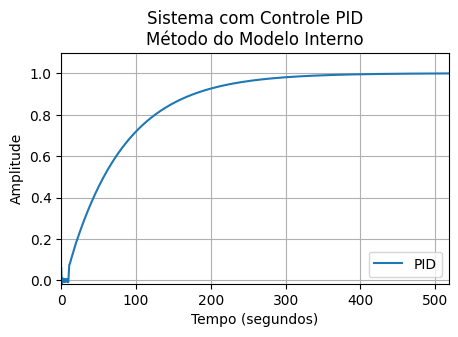

<Figure size 640x480 with 0 Axes>

In [96]:
PID = ctrl.tf([Kp*Td, Kp, Kp/Ti], [1, 0])
Cs = ctrl.series(PID, sys_atraso)

[Tempo, Amplitude] = ctrl.step_response(ctrl.feedback(Cs))
plt.figure(figsize=(5, 3)), plt.plot(Tempo, Amplitude)

plt.title('Sistema com Controle PID\nMétodo do Modelo Interno')
plt.legend(['PID'], loc='lower right'), plt.grid(True)
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([np.min(Amplitude), np.max(Amplitude)*1.1])

infos_PID = ctrl.step_info(ctrl.feedback(Cs))
print('Parâmetros do Sistema Controlado:',
      f'  - Tempo de subida: tr = {infos_PID.get("RiseTime"):.2f} [s]',
      f'  - Overshoot: tr = {infos_PID.get("Overshoot")/100:.2%}', sep='\n')

print(), plt.show(), plt.savefig('IMC.png', dpi=300);

### **Sintonia pelo Método CHR (sem *Overshoot*):**
O Método CHR estabelece dois critérios de desempenho para o sistema considerando o problema servo (mudança de valor do *Setpoint*): resposta mais rápida sem *overshoot* ou resposta mais rápida com $20\%$ de *overshoot*. Os parâmetros do PID para o caso sem *overshoot* são calculados como: $$$$
$$K_P=\frac{0.6\tau}{k\cdot\theta}\ \ \ \ \ T_I=\tau\ \ \ \ \ T_D=\frac{\theta}{2}$$ $$$$

In [98]:
Kp = 0.6*constanteTempo/(ganhoEstatico*atrasoTransporte)
Ti = constanteTempo
Td = atrasoTransporte/2

Parâmetros do Sistema Controlado:
  - Tempo de subida: tr = 35.03 [s]
  - Overshoot: tr = 2.02%



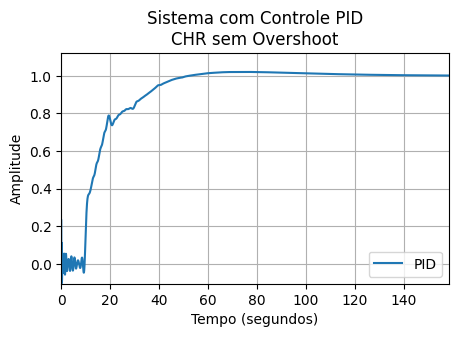

<Figure size 640x480 with 0 Axes>

In [99]:
PID = ctrl.tf([Kp*Td, Kp, Kp/Ti], [1, 0])
Cs = ctrl.series(PID, sys_atraso)

[Tempo, Amplitude] = ctrl.step_response(ctrl.feedback(Cs))
plt.figure(figsize=(5, 3)), plt.plot(Tempo, Amplitude)

plt.title('Sistema com Controle PID\nCHR sem Overshoot')
plt.legend(['PID'], loc='lower right'), plt.grid(True)
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([np.min(Amplitude), np.max(Amplitude)*1.1])

infos_PID = ctrl.step_info(ctrl.feedback(Cs))
print('Parâmetros do Sistema Controlado:',
      f'  - Tempo de subida: tr = {infos_PID.get("RiseTime"):.2f} [s]',
      f'  - Overshoot: tr = {infos_PID.get("Overshoot")/100:.2%}', sep='\n')

print(), plt.show(), plt.savefig('CHRsemOvershoot.png', dpi=300);